In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [8]:
print("Welcome to AirNB: Airlytics-Smart Stay Data Insights — Airbnb Data Analytics Project\n")

# Load dataset with explicit NA values for problematic entries
df = pd.read_excel('/content/Airbnb_Open_Data.xlsx', na_values=['########', ''])

Welcome to AirNB: Airlytics-Smart Stay Data Insights — Airbnb Data Analytics Project



In [9]:
# Drop completely empty rows for data integrity
df.dropna(how='all', inplace=True)

# Standardize column names by stripping any leading/trailing whitespace
df.columns = df.columns.str.strip()

print("Dataset loaded and columns cleaned. Preview:")
print(df.head())

Dataset loaded and columns cleaned. Preview:
        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee  mini

In [10]:
# Clean price and service fee columns by removing currency signs and converting to float for analysis
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

# Convert key numerical columns safely with fallback for missing values
numeric_cols = ['minimum nights', 'number of reviews', 'reviews per month', 'review rate number',
                'calculated host listings count', 'availability 365']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Convert host_identity_verified column to boolean (True for 'verified', else False)
df['host_identity_verified'] = df['host_identity_verified'].apply(lambda x: True if str(x).lower() == 'verified' else False)

print("\nData types and null value summary:")
print(df.info())



Data types and null value summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102599 non-null  bool          
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code        

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2395457497.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-2395457497.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


In [11]:
print("\n-- Starting Data Analytics & Visualization --\n")

# 1. Summary statistics for pricing insights
print("1. Price Summary Statistics:")
print(df['price'].describe())


-- Starting Data Analytics & Visualization --

1. Price Summary Statistics:
count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64


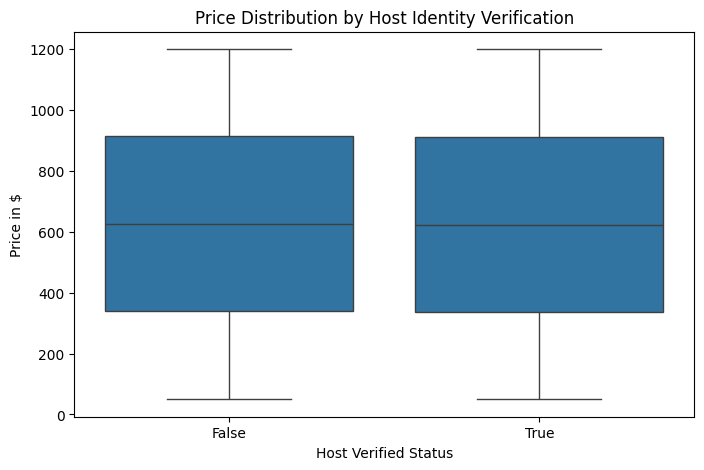

In [12]:
# 2. Price distribution based on host verification status
plt.figure(figsize=(8,5))
sns.boxplot(x='host_identity_verified', y='price', data=df)
plt.title('Price Distribution by Host Identity Verification')
plt.xlabel('Host Verified Status')
plt.ylabel('Price in $')
plt.show()

/tmp/ipython-input-1079162818.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index, palette='cubehelix')


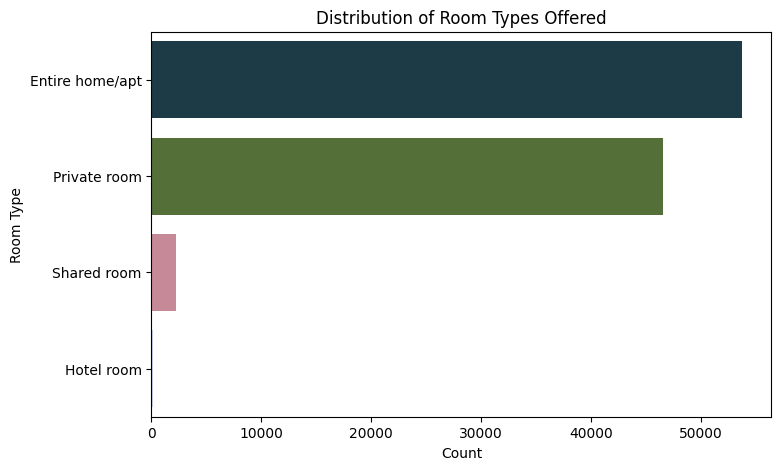

In [13]:
# 3. Room type distribution across the dataset
plt.figure(figsize=(8,5))
sns.countplot(y='room type', data=df, order=df['room type'].value_counts().index, palette='cubehelix')
plt.title('Distribution of Room Types Offered')
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()

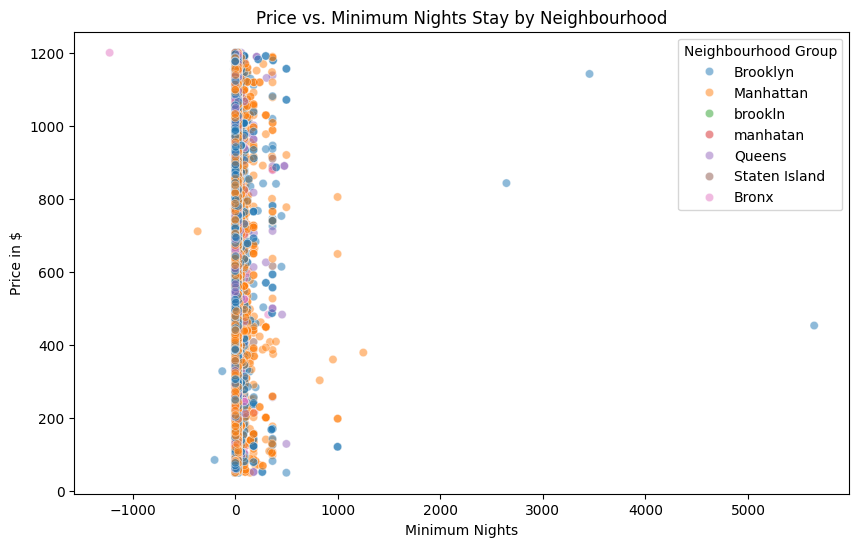

In [14]:
# 4. Price vs minimum stay by neighborhood group
plt.figure(figsize=(10,6))
sns.scatterplot(x='minimum nights', y='price', hue='neighbourhood group', data=df, alpha=0.5)
plt.title('Price vs. Minimum Nights Stay by Neighbourhood')
plt.xlabel('Minimum Nights')
plt.ylabel('Price in $')
plt.legend(title='Neighbourhood Group')
plt.show()

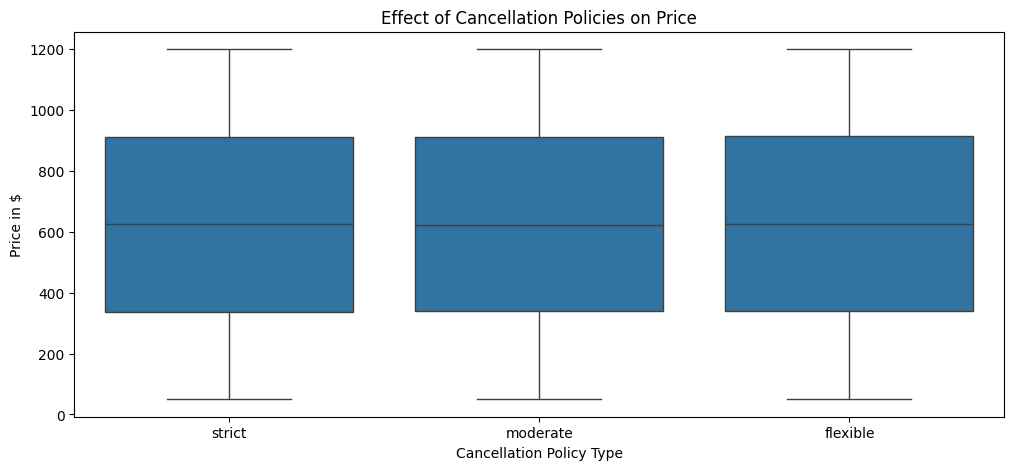

In [15]:
# 5. Impact of cancellation policy on price
plt.figure(figsize=(12,5))
sns.boxplot(x='cancellation_policy', y='price', data=df)
plt.title('Effect of Cancellation Policies on Price')
plt.xlabel('Cancellation Policy Type')
plt.ylabel('Price in $')
plt.show()

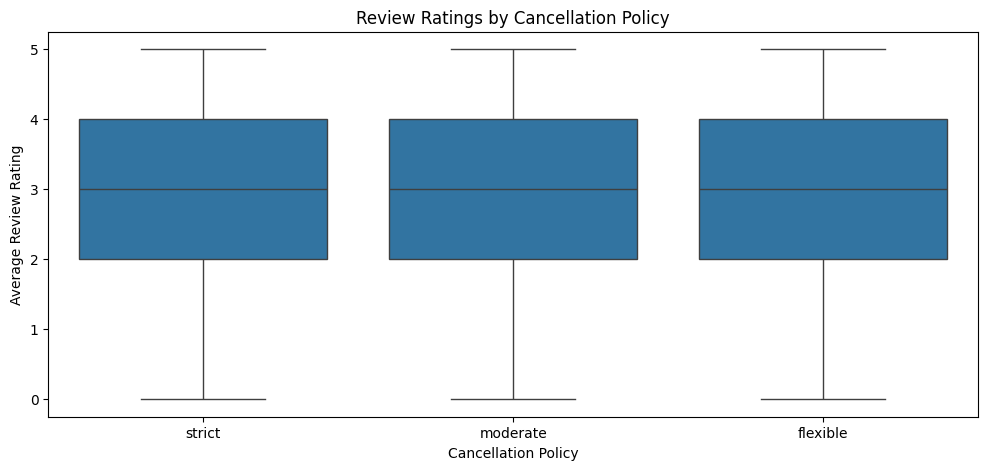

In [16]:
# 6. Impact of cancellation policy on review ratings
plt.figure(figsize=(12,5))
sns.boxplot(x='cancellation_policy', y='review rate number', data=df)
plt.title('Review Ratings by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Average Review Rating')
plt.show()


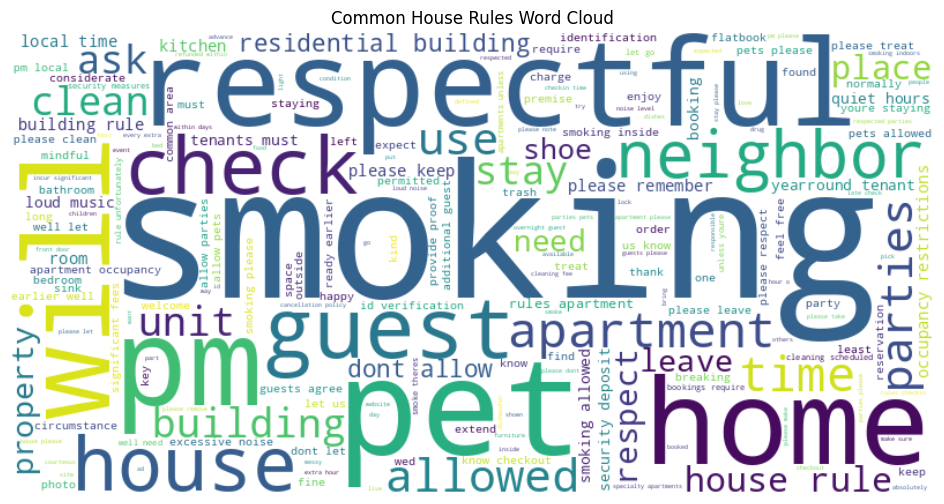

In [17]:

# 7. Word cloud of common house rules — visualizing guest expectations
rules_text = ' '.join(df['house_rules'].dropna().astype(str).values)
rules_text_cleaned = re.sub(r'[^a-zA-Z\s]', '', rules_text).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(rules_text_cleaned)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common House Rules Word Cloud')
plt.show()

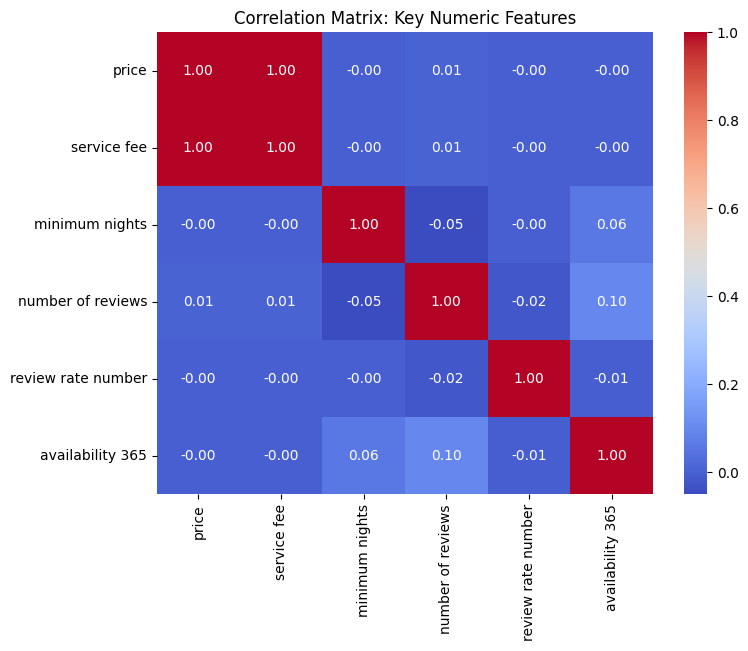

In [18]:
# 8. Correlation matrix of key numeric features to detect relationships
num_cols = ['price', 'service fee', 'minimum nights', 'number of reviews', 'review rate number', 'availability 365']
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Key Numeric Features')
plt.show()



In [19]:
# 9. Neighborhood-wise summary statistics for price and review insights
summary = df.groupby('neighbourhood').agg({
    'price': ['mean', 'median', 'max', 'min'],
    'review rate number': 'mean',
    'availability 365': 'mean',
    'number of reviews': 'sum'
}).reset_index()

print("\nNeighborhood Summary Statistics (Top 5):")
print(summary.head())




Neighborhood Summary Statistics (Top 5):
   neighbourhood       price                       review rate number  \
                        mean median     max    min               mean   
0       Allerton  636.343750  630.0  1195.0   52.0           3.247423   
1  Arden Heights  804.888889  889.0  1136.0  329.0           3.777778   
2       Arrochar  625.764706  629.0  1196.0  116.0           3.384615   
3        Arverne  652.125561  676.0  1197.0   86.0           3.228700   
4        Astoria  639.035275  645.0  1200.0   50.0           3.221748   

  availability 365 number of reviews  
              mean               sum  
0       186.185567            5492.0  
1       145.111111             140.0  
2       228.980769            1318.0  
3       177.417040            7604.0  
4       139.558102           50200.0  


In [20]:
# Save cleaned data for future use or sharing
df.to_csv('Cleaned_Airbnb_Data.csv', index=False)
print("\nCleaned data saved as 'Cleaned_Airbnb_Data.csv'\n")
print("Airlytics: Smart Stay Data Insights - Analysis Complete.")


Cleaned data saved as 'Cleaned_Airbnb_Data.csv'

Airlytics: Smart Stay Data Insights - Analysis Complete.
